Note : idem than 02.01 **except that**
* Filtering ChEMBL with molecules containing atoms only among C,N,O,F,H
* The current **QM9 does not contain charges nor radicals**

In [33]:
import os

QM9_path = os.environ["DATA"] + "/00_datasets/DFT/QM9/filtered_QM9_charges_radicals_stereo.smi"
ChEMBL_path = os.environ["DATA"] + "/00_datasets/ChEMBL25/filtered_ChEMBL_charges_radicals_stereo_CNOF.smi"

ChEMBL_filtered_path = os.environ["DATA"] + "/00_datasets/ChEMBL25/filtered_ChEMBL_charges_radicals_stereo_CNOF_QED_below_QM9.smi"

output_fig_path = os.environ["FIGURES"] + "/00_datasets/ChEMBL25/"

os.makedirs(output_fig_path, exist_ok=True)

In [4]:
def load_dataset(path):
    with open(path, "r") as f:
        smiles_list = [line.split()[0] for line in f.readlines()]
    return smiles_list

In [5]:
QM9_smi = load_dataset(QM9_path)
ChEMBL_smi = load_dataset(ChEMBL_path)

In [6]:
from evomol.evaluation import QEDEvaluationStrategy
import tqdm

s_qed = QEDEvaluationStrategy()

def calc_QED(smiles_list):
    QED_values = [s_qed.eval_smi(smi) for smi in tqdm.tqdm(smiles_list)]
    return QED_values

In [7]:
QM9_QED = calc_QED(QM9_smi)

100%|██████████████████████████████████| 132040/132040 [02:23<00:00, 918.74it/s]


In [8]:
ChEMBL_QED = calc_QED(ChEMBL_smi)

100%|██████████████████████████████████| 867606/867606 [43:39<00:00, 331.21it/s]


In [27]:
import numpy as np

data = {
    "Jeu de données": np.concatenate([np.full(len(QM9_QED), "QM9"), np.full(len(ChEMBL_QED), "ChEMBL CNOF")]),
    "QED": QM9_QED + ChEMBL_QED
}

<Figure size 720x504 with 0 Axes>

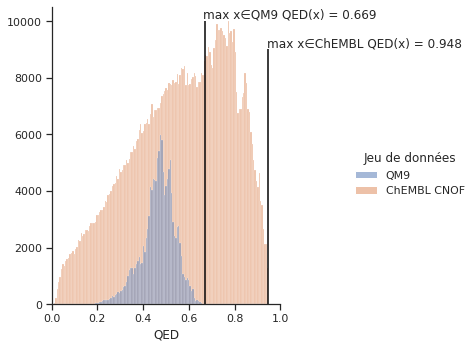

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

plt.figure(figsize=(10, 7))

sns.displot(data=data, x="QED", hue="Jeu de données")
plt.xlim(0, 1)
plt.ylabel("")
plt.vlines(np.max(QM9_QED), 0, 10000, color="black")
plt.text(np.max(QM9_QED)-0.005 ,10100 , "max x∈QM9 QED(x) = 0.669")
plt.vlines(np.max(ChEMBL_QED), 0, 9000, color="black")
plt.text(np.max(ChEMBL_QED)-0.005, 9100, "max x∈ChEMBL QED(x) = 0.948")
plt.tight_layout()

plt.savefig(os.path.join(output_fig_path, "distrib_QED_QM9_filtered_ChEMBL_CNOF_filtered"), dpi=200)

In [9]:
np.max(ChEMBL_QED)

0.9482891443449865

In [12]:
ChEMBL_smi[np.argmax(ChEMBL_QED)]

'CN(C)CCC(=O)N1c2ccccc2NC(=O)c2ccccc21'

In [13]:
np.max(QM9_QED)

0.6687972090186459

In [14]:
QM9_smi[np.argmax(QM9_QED)]

'CCCNc1ccco1'

In [15]:
mask_ChEMBL_inf = np.array(ChEMBL_QED) < np.max(QM9_QED)

In [17]:
ChEMBL_filtered_smi, ChEMBL_filtered_QED = np.array(ChEMBL_smi)[mask_ChEMBL_inf], np.array(ChEMBL_QED)[mask_ChEMBL_inf]

In [18]:
data["dataset"] = np.concatenate([data["dataset"], np.full(len(ChEMBL_filtered_smi), "ChEMBL_filtered")])
data["qed"] = np.concatenate([data["qed"], ChEMBL_filtered_QED])

<AxesSubplot:xlabel='qed', ylabel='Count'>

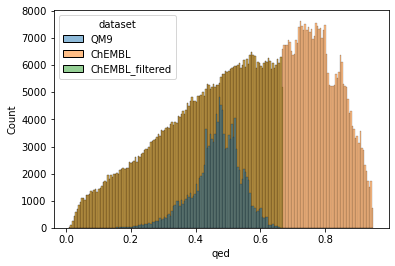

In [19]:
sns.histplot(data=data, x="qed", hue="dataset")

In [20]:
import csv

# with open(ChEMBL_filtered_path, "w") as f:
#     writer = csv.writer(f)
#     rows = [[smi] for smi in ChEMBL_filtered_smi]
#     writer.writerows(rows)

In [21]:
len(ChEMBL_QED)

867606

In [22]:
len(ChEMBL_filtered_QED)

538454

In [23]:
np.mean(ChEMBL_QED)

0.564970754575306

In [24]:
np.mean(ChEMBL_filtered_QED)

0.43059014861669825

In [25]:
np.mean(QM9_QED)

0.4662444626063514